# Importing Data and Modules

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
PATH_DATA = "../data/"

accounts_data = pd.read_csv(PATH_DATA + "instagram_accounts.csv")
posts_data = pd.read_csv(PATH_DATA + "instagram_posts.csv")

In [15]:
# print(accounts_data.head())
# print(accounts_data.info())
print(posts_data.head())
print(posts_data.info())

   Unnamed: 0  id_user    id_post        date   time half_day  views  reposts  \
0           0   672702  638779430  09/11/2017  07:53       am      2       18   
1           1   474227  953043456  09/11/2017  02:03       am     36       11   
2           2   587566  650889385  09/11/2017  02:57       am     59       11   
3           3   483543  144265898  09/11/2017  11:43       am     21       14   
4           4   394103  955542283  09/11/2017  04:53       pm     16        3   

   likes  comments  id_post_origin  link_clicks  donation_tag  donation_val  \
0      0         0               0         True         False             0   
1     16         1               0         True         False             0   
2      8         1               0         True         False             0   
3      9         2               0         True         False             0   
4      2         0       638779430        False         False             0   

   house_buy  
0      False  
1      F

# Data Analysis

We can look at interesting features of our data here.

In [16]:
## House_Buy Data
posts_data['house_buy'].value_counts()

False    1194
Name: house_buy, dtype: int64

count    1194.000000
mean       82.602178
std        62.045721
min         0.000000
25%        33.000000
50%        70.500000
75%       120.750000
max       387.000000
Name: views, dtype: float64

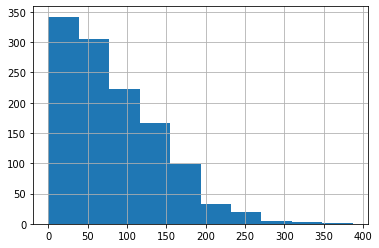

In [17]:
posts_data["views"].hist()
posts_data["views"].describe()

In [18]:

posts_data['link_clicks'].value_counts()

False    1077
True      117
Name: link_clicks, dtype: int64

In [19]:
posts_data["id_post_origin"].value_counts(sort=True, ascending=False)

638779430    16
760062606    14
144265898    13
953043456    11
650889385    10
             ..
673179308     1
741621458     1
922389702     1
255210644     1
810913610     1
Name: id_post_origin, Length: 458, dtype: int64

In [20]:
posts_data[["id_post","reposts"]].sort_values(by="reposts", ascending=False)

,id_post,reposts
0,638779430,18
3,144265898,14
23,760062606,14
20,844989061,12
15,972167608,11
...,...,...
927,474005636,0
614,433897630,0
924,669220907,0
617,411768294,0


In [21]:
posts_data[ posts_data['id_user'].duplicated() == True ]

,Unnamed: 0,id_user,id_post,date,time,half_day,views,reposts,likes,comments,id_post_origin,link_clicks,donation_tag,donation_val,house_buy


In [22]:
posts_data[posts_data["id_user"] == 603282]

,Unnamed: 0,id_user,id_post,date,time,half_day,views,reposts,likes,comments,id_post_origin,link_clicks,donation_tag,donation_val,house_buy
1129,1129,603282,408653209,11/11/2017,12:02,pm,55,0,24,1,572056570,True,False,0,False


In [23]:
# posts_data.loc[:, "id_post"==572056570 |"id_post_origin" ==572056570]

posts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1194 non-null   int64 
 1   id_user         1194 non-null   int64 
 2   id_post         1194 non-null   int64 
 3   date            1194 non-null   object
 4   time            1194 non-null   object
 5   half_day        1194 non-null   object
 6   views           1194 non-null   int64 
 7   reposts         1194 non-null   int64 
 8   likes           1194 non-null   int64 
 9   comments        1194 non-null   int64 
 10  id_post_origin  1194 non-null   int64 
 11  link_clicks     1194 non-null   bool  
 12  donation_tag    1194 non-null   bool  
 13  donation_val    1194 non-null   int64 
 14  house_buy       1194 non-null   bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 115.6+ KB


0      2022-01-26 07:53:00
1      2022-01-26 02:03:00
2      2022-01-26 02:57:00
3      2022-01-26 11:43:00
4      2022-01-26 16:53:00
               ...        
1189   2022-01-26 17:40:00
1190   2022-01-26 20:10:00
1191   2022-01-26 15:00:00
1192   2022-01-26 12:36:00
1193   2022-01-26 23:10:00
Name: time24, Length: 1194, dtype: datetime64[ns]


12    103
23     68
14     66
0      65
20     65
22     64
19     58
17     56
15     55
16     54
21     53
13     53
18     50
6      47
4      46
10     38
2      37
3      34
9      33
7      32
1      31
8      31
11     28
5      27
Name: time24, dtype: int64

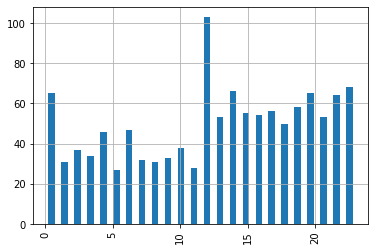

In [26]:
posts_data['time24'] = posts_data['time'] + " " + posts_data['half_day']
posts_data['time24'] = pd.to_datetime(posts_data['time24'])
print(posts_data['time24'])
posts_data['time24'].dt.hour.hist(bins=24, rwidth=0.5)
plt.xticks(rotation=90)

posts_data['time24'].dt.hour.value_counts()